In [237]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
f=open("sawyr10.txt")
f=f.read()
sentences = sent_tokenize(f)

#Tokens
tokenizer = RegexpTokenizer('[A-Za-z]\w+')
tokens=tokenizer.tokenize(f)
#print(tokens)

In [238]:
#Types
Types=[]
zipfd= {}
for word in tokens:
    if word in Types:
        zipfd[word]=zipfd[word]+1
    if word not in Types:
        Types=Types + [word]
        zipfd[word]=1
#print(Types)

In [239]:
#TTR Ratio
print("TOKENS : "+ str(len(tokens)))
print("TYPES : "+ str(len(Types)))
TTR = float(len(Types))/len(tokens)
print("TTR : %f" %(TTR))


TOKENS : 69351
TYPES : 8024
TTR : 0.115701


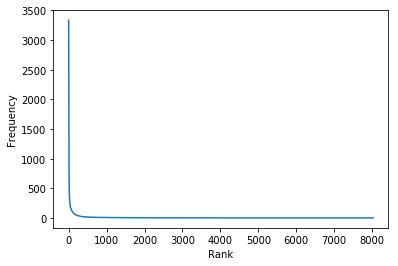

In [240]:
#Zipf's Law : plot Frequency vs Rank
#Zipf's Law states that frequency is proportional to inverse of rank
zipfl = map(list, zipfd.items())
zipfl = sorted(zipfl, key=lambda x: x[1], reverse=True)


import matplotlib.pyplot as grph
rank=[]
freq=[]
for z in zipfl:
    rank=rank+[len(freq)+1]
    freq =freq+[z[1]]
grph.plot(rank,freq) 
grph.xlabel('Rank')
grph.ylabel('Frequency')
grph.show()

Zipf's Law : length_of_word * frequency = constant
value of constant = 7.902373


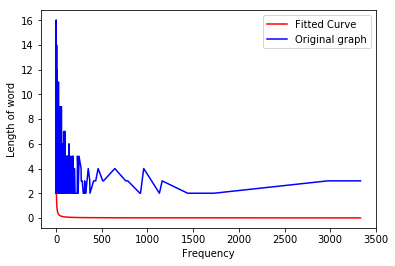

In [241]:
# Word length is inversely proportional to frequency
for entry in zipfl:
    entry.append(len(entry[0]))

len_w=[]
for i in zipfl:
    len_w=len_w+[i[2]]


# let l=h/f where l =length of word and f=frequency
from scipy.optimize import curve_fit
def func(freq,h):
    return h/freq
popt, pcov = curve_fit(func, freq, len_w)

h=popt[0]
print("Zipf's Law : length_of_word * frequency = constant\nvalue of constant = %f"%h)

import matplotlib.pyplot as lzipf
lzipf.plot(freq, func(freq, *popt), 'r-',label='Fitted Curve')
lzipf.plot(freq, len_w, 'b-', label='Original graph')
lzipf.xlabel('Frequency')
lzipf.ylabel('Length of word')       
lzipf.legend()
lzipf.show()

Zipf's Law : meaning = constant * (frequency^(1/2))
value of constant = 0.761903


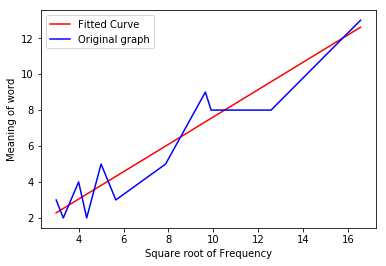

In [242]:
# Number of meanings of a word are directly proportional to the square root of frequency
from nltk.corpus import wordnet
#print(zipfl)

meanings=[]
wordm=[]
for i in range(len(zipfl)):
    meaning=wordnet.synsets(zipfl[i][0])
    if len(meaning)>0:
        zipfl[i].append(len(meaning))
        meanings=meanings+[i]


wordm=[]
for i in meanings:
    wordm.append(zipfl[i]+[math.sqrt(zipfl[i][1])])

#m=p*(f^(1/2))
#Selecting any 20 words from the list wordm at random and checking that >>>> m/(f^(1/2)) = p = constant 

pmean=[['were', 274, 4, 13, 16.55294535724685],['village', 50, 7, 3, 3, 3, 3, 7.0710678118654755],['door', 47, 4, 5, 5, 5, 5, 6.855654600401044],['us', 51, 2, 4, 4, 4, 4, 7.14142842854285],['about', 158, 5, 8, 12.569805089976535],['till', 55, 4, 4, 4, 4, 4, 7.416198487095663],['along', 62, 5, 5, 7.874007874011811],['night', 98, 5, 8, 9.899494936611665],['only', 93, 4, 9, 9.643650760992955],['money', 32, 5, 3, 5.656854249492381],['sir', 19, 3, 2, 4.358898943540674],['besides', 11, 7, 2, 3.3166247903554]]
#len(pmean)
pmean = sorted(pmean, key=lambda x: x[4])
f=[]
m=[]
for i in pmean:
    f=f+[i[4]]
    m=m+[i[3]]
        
from scipy.optimize import curve_fit
def func(f,q):
    return q*(f)
popt, pcov = curve_fit(func, f, m)

q=popt
print("Zipf's Law : meaning = constant * (frequency^(1/2))\nvalue of constant = %f"%q)

import matplotlib.pyplot as mzipf
mzipf.plot(f, func(f,q), 'r-',label='Fitted Curve')
mzipf.plot(f, m, 'b-', label='Original graph')
mzipf.xlabel('Square root of Frequency')
mzipf.ylabel('Meaning of word')       
mzipf.legend()
mzipf.show()


In [243]:
# HEAPS LAW 

vocab_d={}
words=[]
heap=[]
for sentence in sentences:
    words=words+[tokenizer.tokenize(sentence)]

for i in words:
    uniq=0
    for word in i:
        if word not in vocab_d:
            vocab_d[word]=1
            uniq=uniq+1
        else:
            vocab_d[word]=vocab_d[word]+1
    heap=heap+[[len(i),uniq]]

V=[0]
N=[0]
for i in range(len(heap)):
    V=V+[V[i]+heap[i][1]]
    N=N+[N[i]+heap[i][0]]



Heaps Law : |V|=k(N^B)
value of k = 11
value of B = 0


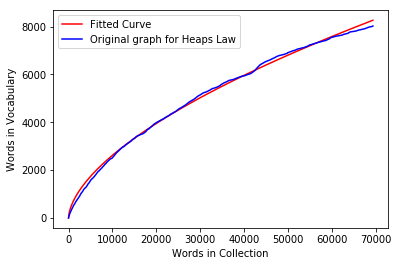

In [244]:
#Plot of Heaps Law
from scipy.optimize import curve_fit
def func(N,k,B):
    return k*(N**B)
popt, pcov = curve_fit(func, N, V)
k=popt[0]
B=popt[1]
print("Heaps Law : |V|=k(N^B)\nvalue of k = %d"%k)
print("value of B = %d"%B)


import matplotlib.pyplot as heaps
heaps.plot(N, func(N, *popt), 'r-',label='Fitted Curve')
heaps.plot(N, V, 'b-', label='Original graph for Heaps Law')
heaps.xlabel('Words in Collection')
heaps.ylabel('Words in Vocabulary')       
heaps.legend()
heaps.show()